<a href="https://colab.research.google.com/github/oliviachchoi/SDproject-bike-/blob/main/final_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 만든 최종 데이터셋 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/content/drive/MyDrive/따릉이 project/만든 데이터/final_data_1.csv', encoding='UTF-8')

In [2]:
df.head()

,Unnamed: 0,year,month,day,hour,stno,stname,num,미세먼지 평균,초미세먼지 평균,rainval,tempval,humval,windval
0,0,2020,1,1,0,2213,고속터미널역 5번출구 앞,1,28.0,17.0,0.0,-3.7,78.0,1.4
1,1,2020,1,1,0,2222,사당역 12번출구 뒤,1,28.0,17.0,0.0,-3.7,78.0,1.4
2,2,2020,1,1,0,2251,더케이호텔 입구(양재2),1,28.0,17.0,0.0,-3.7,78.0,1.4
3,3,2020,1,1,0,2256,양재동 꽃시장 입구,1,28.0,17.0,0.0,-3.7,78.0,1.4
4,4,2020,1,1,0,2268,서초4동주민센터,2,28.0,17.0,0.0,-3.7,78.0,1.4


In [3]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [4]:
df.head()

,year,month,day,hour,stno,stname,num,미세먼지 평균,초미세먼지 평균,rainval,tempval,humval,windval
0,2020,1,1,0,2213,고속터미널역 5번출구 앞,1,28.0,17.0,0.0,-3.7,78.0,1.4
1,2020,1,1,0,2222,사당역 12번출구 뒤,1,28.0,17.0,0.0,-3.7,78.0,1.4
2,2020,1,1,0,2251,더케이호텔 입구(양재2),1,28.0,17.0,0.0,-3.7,78.0,1.4
3,2020,1,1,0,2256,양재동 꽃시장 입구,1,28.0,17.0,0.0,-3.7,78.0,1.4
4,2020,1,1,0,2268,서초4동주민센터,2,28.0,17.0,0.0,-3.7,78.0,1.4


In [5]:
#station no와 stname을 따로 newDF 로 빼두기
station_match= df[['stno','stname']]

In [33]:
station_match=station_match.drop_duplicates(keep='first')

In [34]:
station_match

,stno,stname
0,2213,고속터미널역 5번출구 앞
1,2222,사당역 12번출구 뒤
2,2251,더케이호텔 입구(양재2)
3,2256,양재동 꽃시장 입구
4,2268,서초4동주민센터
...,...,...
151764,2519,서초2교(사임당로 방면)
158784,2524,반포쇼핑타운 8동 앞
166850,2550,양재동 꽃시장 건너편
190707,2539,대한무역투자진흥공사 KOTRA 앞


In [7]:
df.drop('stname',axis=1, inplace=True)

In [8]:
df

,year,month,day,hour,stno,num,미세먼지 평균,초미세먼지 평균,rainval,tempval,humval,windval
0,2020,1,1,0,2213,1,28.0,17.0,0.0,-3.7,78.0,1.4
1,2020,1,1,0,2222,1,28.0,17.0,0.0,-3.7,78.0,1.4
2,2020,1,1,0,2251,1,28.0,17.0,0.0,-3.7,78.0,1.4
3,2020,1,1,0,2256,1,28.0,17.0,0.0,-3.7,78.0,1.4
4,2020,1,1,0,2268,2,28.0,17.0,0.0,-3.7,78.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...
359515,2020,12,31,23,2294,1,24.0,10.0,0.0,-6.6,63.0,0.8
359516,2020,12,31,23,2502,1,24.0,10.0,0.0,-6.6,63.0,0.8
359517,2020,12,31,23,2508,1,24.0,10.0,0.0,-6.6,63.0,0.8
359518,2020,12,31,23,2524,1,24.0,10.0,0.0,-6.6,63.0,0.8


# 데이터 뜯어보기 및 EDA

## stno

In [9]:
df.stno.unique()

array([2213, 2222, 2251, 2256, 2268, 2272, 2276, 2279, 2292, 2505, 2219,
       2228, 2229, 2231, 2264, 2274, 2277, 2280, 2297, 2502, 2230, 2255,
       2293, 2508, 2220, 2250, 2206, 2244, 2247, 2248, 2263, 2217, 2245,
       2294, 2205, 2299, 2203, 2235, 2242, 2246, 2259, 2503, 2202, 2270,
       2223, 2233, 2237, 2252, 2262, 2271, 2285, 2511, 2269, 2501, 2506,
       2510, 2266, 2288, 2283, 2509, 2211, 2212, 2221, 2265, 2249, 2281,
       2282, 2504, 2257, 2275, 2284, 2214, 2215, 2227, 2241, 2258, 2273,
       2201, 2225, 2210, 2239, 2243, 2226, 2289, 2298, 2207, 2286, 2287,
       2529, 2540, 2533, 2532, 2517, 2537, 2518, 2521, 2520, 2530, 2516,
       2514, 2538, 2542, 2523, 2526, 2547, 2528, 2531, 2541, 2515, 2545,
       2527, 2535, 2534, 2536, 2548, 2525, 2549, 2519, 2524, 2550, 2539,
       2543])

In [13]:
#가장 대여를 많이 한 대여소
df_borrow=df[['stno','num']]
df_borrow=df_borrow.groupby('stno').sum()

In [24]:
df_borrow

,num
stno,
2201,1882
2202,11156
2203,3336
2205,6089
2206,10100
...,...
2545,676
2547,236
2548,1011


In [35]:
station_match[station_match['stno']==2219]

,stno,stname
10,2219,"고속터미널역 8-1번, 8-2번 출구 사이"


In [29]:
import plotly.express as px
fig= px.bar(df_borrow, x=df_borrow.index, y='num')
fig.show()
#x=2219 인 정류소,즉 고속버스 터미널 8-1번 8-2번이 압도적으로 대여 수가 많다. 

In [36]:
#그래프에서 적은건 정말 적어보이는데 실제로 최소는 1년동안 34개밖에 안빌림
df_borrow.num.min()

34

In [41]:
#하나가 너무 크게 나오기 때문에 쟤를 빼고 분석
#그래도 적은건 여전히 그래프에 안나옴
#따릉이 대여소가늬 대여량 차이가 극명하게 나타남
.
# k=df_borrow[df_borrow.index!=2219]
# k
# fig= px.bar(k, x=k.index, y='num')
# fig.show()

## 가장 대여 수가 많은 2219 부터 살펴보겠다

In [42]:
df_2219= df[df['stno']==2219]

In [43]:
df_2219

,year,month,day,hour,stno,num,미세먼지 평균,초미세먼지 평균,rainval,tempval,humval,windval
10,2020,1,1,1,2219,2,30.0,12.0,0.0,-3.2,84.0,1.1
21,2020,1,1,2,2219,3,22.0,12.0,0.0,-2.1,77.0,1.4
46,2020,1,1,5,2219,1,28.0,18.0,0.0,0.5,66.0,1.1
59,2020,1,1,7,2219,4,29.0,18.0,0.0,1.3,66.0,1.0
66,2020,1,1,8,2219,1,29.0,15.0,0.0,0.4,68.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
359421,2020,12,31,19,2219,2,41.0,10.0,0.0,-9.8,68.0,0.8
359454,2020,12,31,20,2219,2,30.0,12.0,0.0,-9.4,72.0,0.9
359479,2020,12,31,21,2219,3,27.0,10.0,0.0,-8.4,67.0,0.6
359500,2020,12,31,22,2219,2,32.0,14.0,0.0,-8.6,72.0,0.7


In [52]:
print(df_2219.num.unique()) #한 시간에 최대 90개를 빌린 적이 있다?
print(df_2219.num.unique().max())
print('----------------------------')
print(df_2219.num.value_counts())

[ 2  3  1  4  5  6  7  8 10  9 14 12 13 11 16 18 17 33 20 15 23 27 28 21
 26 38 35 47 55 22 24 37 19 25 30 34 54 32 45 44 46 83 31 39 40 29 63 41
 36 60 52 51 66 50 64 61 48 42 62 67 43 49 57 76 90 69 53 73 88 70 58 82
 59 65 56]
90
----------------------------
1     1238
2      880
3      709
4      510
5      421
      ... 
88       1
65       1
82       1
90       1
83       1
Name: num, Length: 75, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'borrowd num')

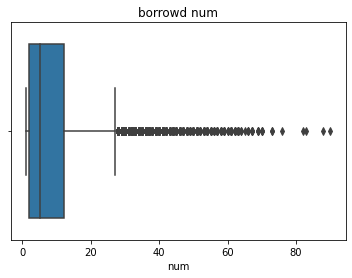

In [56]:
sns.boxplot(df_2219.num)
plt.title('borrowd num')